Let's import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Create the data frame

In [2]:
df=pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


As we can see, this is a huge data frame we will definitely narrow down our scope

Let's see some statistics

In [3]:
df.describe().round()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,411804.0,410159.0,408929.0,411804.0,410608.0,409378.0,411804.0,410159.0,408929.0,411804.0,...,243817.0,161741.0,290689.0,390299.0,319127.0,4.294350e+05,13411.0,13411.0,13411.0,13411.0
mean,7365292.0,8017.0,8041.0,81260.0,72.0,72.0,112096.0,122.0,123.0,836.0,...,33.0,51.0,3.0,74.0,1.0,1.520336e+08,56048.0,10.0,11.0,1773.0
std,44775817.0,229665.0,86616.0,441190.0,1368.0,514.0,162240.0,1509.0,560.0,1135.0,...,14.0,32.0,3.0,7.0,0.0,6.975408e+08,156869.0,12.0,25.0,1992.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1.0,0.0,53.0,0.0,4.700000e+01,-37726.0,-44.0,-96.0,-2936.0
25%,6281.0,0.0,0.0,43.0,0.0,0.0,1916.0,0.0,0.0,25.0,...,23.0,21.0,1.0,70.0,1.0,5.237980e+05,177.0,2.0,-2.0,117.0
50%,63653.0,0.0,12.0,799.0,0.0,0.0,29145.0,0.0,3.0,295.0,...,33.0,50.0,2.0,75.0,1.0,6.336393e+06,6815.0,8.0,6.0,1271.0
75%,758272.0,0.0,313.0,9574.0,0.0,3.0,156770.0,0.0,56.0,1284.0,...,42.0,83.0,4.0,79.0,1.0,3.296952e+07,39128.0,15.0,16.0,2883.0
max,775866783.0,44236227.0,6319461.0,7057132.0,103719.0,14817.0,763599.0,241758.0,34537.0,6601.0,...,78.0,100.0,14.0,87.0,1.0,7.975105e+09,1349776.0,78.0,378.0,10294.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

We have a lot of null values in the data frame, and also the 'date' column is not in a date format

In [5]:
df['date'] = pd.to_datetime(df['date'])

let's see the unique values, sorted in order, so we can see which columns could have categorical values

In [6]:
df.nunique().reset_index().rename(columns={'index': 'column_name', 0: 'unique_values'}).sort_values('unique_values').head(30)

,column_name,unique_values
33,tests_units,4
1,continent,6
53,extreme_poverty,76
58,handwashing_facilities,96
59,hospital_beds_per_thousand,102
56,female_smokers,112
57,male_smokers,127
49,median_age,142
55,diabetes_prevalence,150
61,human_development_index,154


Let's group by, so we can have a usable data frame, with the catefories that could be relevant to our scope, to vaccination ratios of the countries, some tendencies regarding that

In [7]:
df.groupby(['continent','location']).agg({'people_vaccinated':'max','population':'max', 
                                          'gdp_per_capita':'max', 'population_density':'max', 'median_age':'max', 'human_development_index': 'max', 
                                          'reproduction_rate':'max', 'life_expectancy':'max' }).reset_index()

,continent,location,people_vaccinated,population,gdp_per_capita,population_density,median_age,human_development_index,reproduction_rate,life_expectancy
0,Africa,Algeria,7840131.0,44903228,13913.839,17.348,29.1,0.748,1.79,76.88
1,Africa,Angola,16550642.0,35588996,5819.495,23.890,16.8,0.581,2.94,61.15
2,Africa,Benin,3697190.0,13352864,2064.236,99.110,18.8,0.545,1.09,61.77
3,Africa,Botswana,1951054.0,2630300,15807.374,4.044,25.8,0.735,1.43,69.59
4,Africa,Burkina Faso,6089089.0,22673764,1703.102,70.151,17.6,0.452,1.54,61.58
...,...,...,...,...,...,...,...,...,...,...
238,South America,Paraguay,3993938.0,6780745,8827.010,17.144,26.5,0.728,1.42,74.25
239,South America,Peru,30563708.0,34049588,12236.706,25.129,29.1,0.777,1.99,76.74
240,South America,Suriname,267820.0,618046,13767.119,3.612,29.6,0.738,2.43,71.68
241,South America,Uruguay,3010451.0,3422796,20551.409,19.751,35.6,0.817,1.61,77.91


Let's create a new data frame from it

In [8]:
vaccination_df=df.groupby(['continent','location']).agg({'people_vaccinated':'max','population':'max', 
                                          'gdp_per_capita':'max', 'population_density':'max', 'median_age':'max', 'human_development_index': 'max', 
                                          'reproduction_rate':'max', 'life_expectancy':'max' }).reset_index()
vaccination_df

,continent,location,people_vaccinated,population,gdp_per_capita,population_density,median_age,human_development_index,reproduction_rate,life_expectancy
0,Africa,Algeria,7840131.0,44903228,13913.839,17.348,29.1,0.748,1.79,76.88
1,Africa,Angola,16550642.0,35588996,5819.495,23.890,16.8,0.581,2.94,61.15
2,Africa,Benin,3697190.0,13352864,2064.236,99.110,18.8,0.545,1.09,61.77
3,Africa,Botswana,1951054.0,2630300,15807.374,4.044,25.8,0.735,1.43,69.59
4,Africa,Burkina Faso,6089089.0,22673764,1703.102,70.151,17.6,0.452,1.54,61.58
...,...,...,...,...,...,...,...,...,...,...
238,South America,Paraguay,3993938.0,6780745,8827.010,17.144,26.5,0.728,1.42,74.25
239,South America,Peru,30563708.0,34049588,12236.706,25.129,29.1,0.777,1.99,76.74
240,South America,Suriname,267820.0,618046,13767.119,3.612,29.6,0.738,2.43,71.68
241,South America,Uruguay,3010451.0,3422796,20551.409,19.751,35.6,0.817,1.61,77.91


Let's inspect our new data frame

In [9]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continent                243 non-null    object 
 1   location                 243 non-null    object 
 2   people_vaccinated        223 non-null    float64
 3   population               243 non-null    int64  
 4   gdp_per_capita           195 non-null    float64
 5   population_density       214 non-null    float64
 6   median_age               200 non-null    float64
 7   human_development_index  189 non-null    float64
 8   reproduction_rate        194 non-null    float64
 9   life_expectancy          233 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.1+ KB


We have a some missing values. We will have to remove them, I need a clean an usable dataset, which could be used properly later

In [10]:
vaccination_df=vaccination_df.dropna(how='any').reset_index(drop=True)
vaccination_df

,continent,location,people_vaccinated,population,gdp_per_capita,population_density,median_age,human_development_index,reproduction_rate,life_expectancy
0,Africa,Algeria,7840131.0,44903228,13913.839,17.348,29.1,0.748,1.79,76.88
1,Africa,Angola,16550642.0,35588996,5819.495,23.890,16.8,0.581,2.94,61.15
2,Africa,Benin,3697190.0,13352864,2064.236,99.110,18.8,0.545,1.09,61.77
3,Africa,Botswana,1951054.0,2630300,15807.374,4.044,25.8,0.735,1.43,69.59
4,Africa,Burkina Faso,6089089.0,22673764,1703.102,70.151,17.6,0.452,1.54,61.58
...,...,...,...,...,...,...,...,...,...,...
171,South America,Paraguay,3993938.0,6780745,8827.010,17.144,26.5,0.728,1.42,74.25
172,South America,Peru,30563708.0,34049588,12236.706,25.129,29.1,0.777,1.99,76.74
173,South America,Suriname,267820.0,618046,13767.119,3.612,29.6,0.738,2.43,71.68
174,South America,Uruguay,3010451.0,3422796,20551.409,19.751,35.6,0.817,1.61,77.91


In [11]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continent                176 non-null    object 
 1   location                 176 non-null    object 
 2   people_vaccinated        176 non-null    float64
 3   population               176 non-null    int64  
 4   gdp_per_capita           176 non-null    float64
 5   population_density       176 non-null    float64
 6   median_age               176 non-null    float64
 7   human_development_index  176 non-null    float64
 8   reproduction_rate        176 non-null    float64
 9   life_expectancy          176 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ KB


Let's create a key ratio; the vaccinated population ratio of each country

In [12]:
vaccination_df['vaccinated_ratio']=vaccination_df['people_vaccinated']/vaccination_df['population']
vaccination_df

,continent,location,people_vaccinated,population,gdp_per_capita,population_density,median_age,human_development_index,reproduction_rate,life_expectancy,vaccinated_ratio
0,Africa,Algeria,7840131.0,44903228,13913.839,17.348,29.1,0.748,1.79,76.88,0.174601
1,Africa,Angola,16550642.0,35588996,5819.495,23.890,16.8,0.581,2.94,61.15,0.465049
2,Africa,Benin,3697190.0,13352864,2064.236,99.110,18.8,0.545,1.09,61.77,0.276884
3,Africa,Botswana,1951054.0,2630300,15807.374,4.044,25.8,0.735,1.43,69.59,0.741761
4,Africa,Burkina Faso,6089089.0,22673764,1703.102,70.151,17.6,0.452,1.54,61.58,0.268552
...,...,...,...,...,...,...,...,...,...,...,...
171,South America,Paraguay,3993938.0,6780745,8827.010,17.144,26.5,0.728,1.42,74.25,0.589012
172,South America,Peru,30563708.0,34049588,12236.706,25.129,29.1,0.777,1.99,76.74,0.897623
173,South America,Suriname,267820.0,618046,13767.119,3.612,29.6,0.738,2.43,71.68,0.433333
174,South America,Uruguay,3010451.0,3422796,20551.409,19.751,35.6,0.817,1.61,77.91,0.879530


In [13]:
vaccination_df.describe().round(1)

,people_vaccinated,population,gdp_per_capita,population_density,median_age,human_development_index,reproduction_rate,life_expectancy,vaccinated_ratio
count,1.760000e+02,1.760000e+02,176.0,176.0,176.0,176.0,176.0,176.0,176.0
mean,3.163153e+07,4.452917e+07,18275.2,202.4,30.2,0.7,2.1,72.6,0.6
std,1.288128e+08,1.563693e+08,19451.2,637.7,9.0,0.1,0.7,7.4,0.2
min,3.690900e+04,9.377200e+04,661.2,2.0,15.1,0.4,0.5,53.3,0.0
25%,9.964032e+05,2.703279e+06,4126.5,34.8,22.2,0.6,1.6,67.2,0.4
50%,4.984623e+06,9.960046e+06,11822.1,81.5,29.4,0.7,2.0,74.0,0.6
75%,1.707023e+07,3.396606e+07,26481.1,199.2,38.4,0.8,2.5,77.7,0.8
max,1.310292e+09,1.425887e+09,116935.6,7915.7,48.2,1.0,5.9,84.6,1.1


In [14]:
print({
  'columns': vaccination_df.columns,  
  'info': vaccination_df,  
  'describe': vaccination_df.describe(),  
  'head': vaccination_df.head(10),  
  'nunique': vaccination_df.nunique()  
})

{'columns': Index(['continent', 'location', 'people_vaccinated', 'population',
       'gdp_per_capita', 'population_density', 'median_age',
       'human_development_index', 'reproduction_rate', 'life_expectancy',
       'vaccinated_ratio'],
      dtype='object'), 'info':          continent      location  people_vaccinated  population  \
0           Africa       Algeria          7840131.0    44903228   
1           Africa        Angola         16550642.0    35588996   
2           Africa         Benin          3697190.0    13352864   
3           Africa      Botswana          1951054.0     2630300   
4           Africa  Burkina Faso          6089089.0    22673764   
..             ...           ...                ...         ...   
171  South America      Paraguay          3993938.0     6780745   
172  South America          Peru         30563708.0    34049588   
173  South America      Suriname           267820.0      618046   
174  South America       Uruguay          3010451.0     3

Let's do univariate analysis, by creating nummerical columns, categorical columns

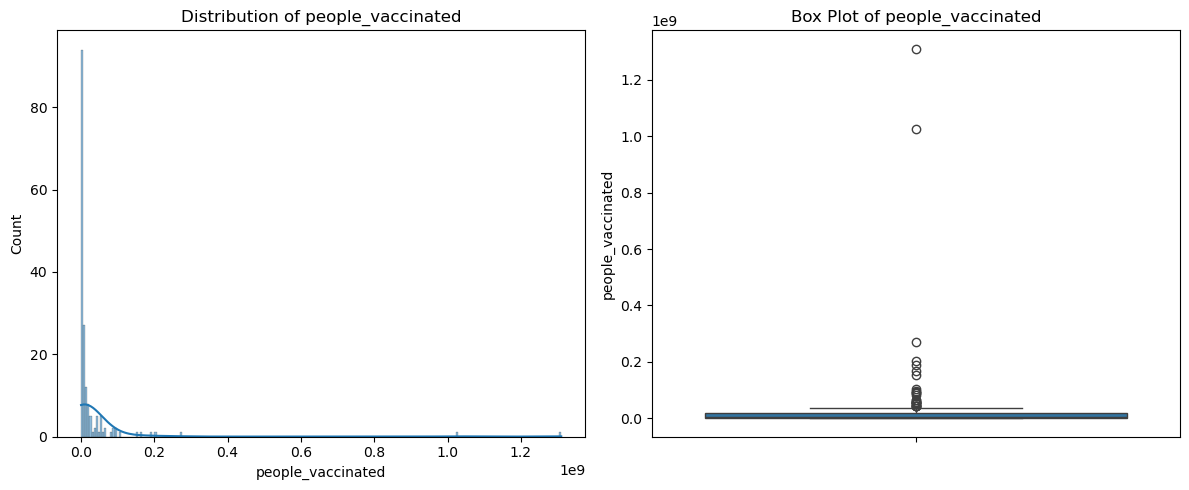


Descriptive Statistics for people_vaccinated:
count    1.760000e+02
mean     3.163153e+07
std      1.288128e+08
min      3.690900e+04
25%      9.964032e+05
50%      4.984623e+06
75%      1.707023e+07
max      1.310292e+09
Name: people_vaccinated, dtype: float64
Skewness: 8.392728095992839
Kurtosis: 75.60297757978667




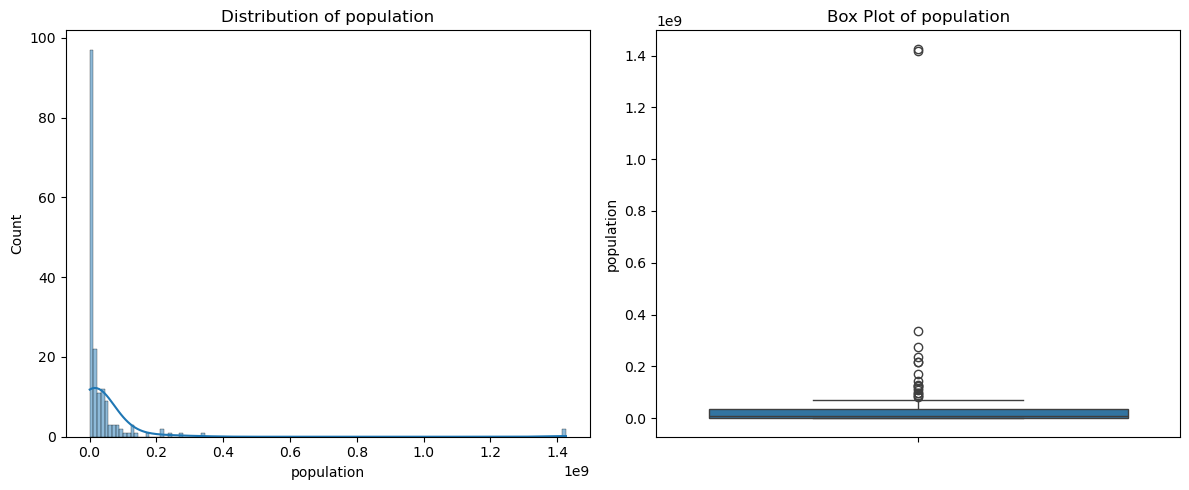


Descriptive Statistics for population:
count    1.760000e+02
mean     4.452917e+07
std      1.563693e+08
min      9.377200e+04
25%      2.703279e+06
50%      9.960046e+06
75%      3.396606e+07
max      1.425887e+09
Name: population, dtype: float64
Skewness: 7.975385206411421
Kurtosis: 68.21664357041243




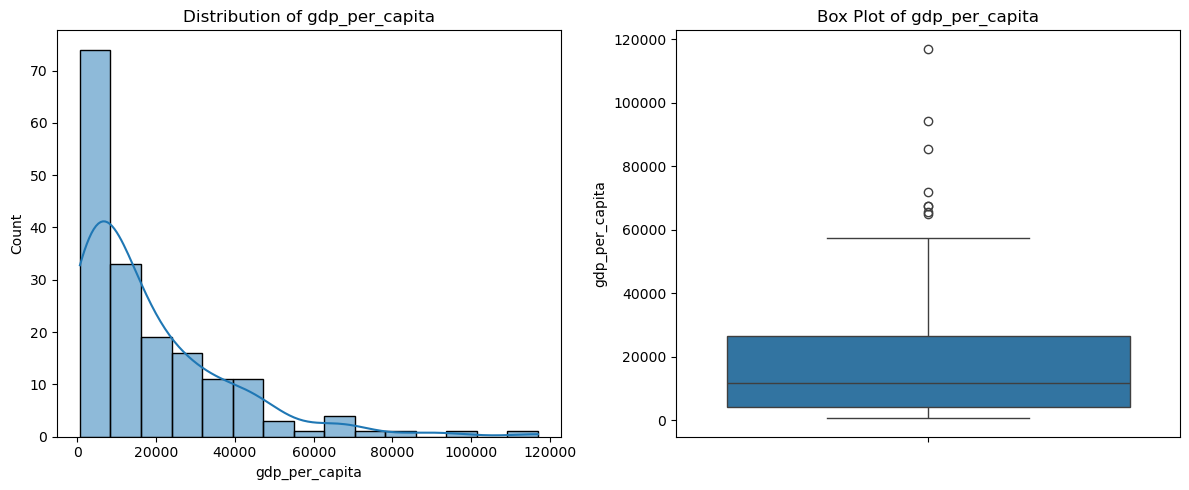


Descriptive Statistics for gdp_per_capita:
count       176.000000
mean      18275.225915
std       19451.227210
min         661.240000
25%        4126.521000
50%       11822.138500
75%       26481.105500
max      116935.600000
Name: gdp_per_capita, dtype: float64
Skewness: 1.9494863881821762
Kurtosis: 4.9598338179832595




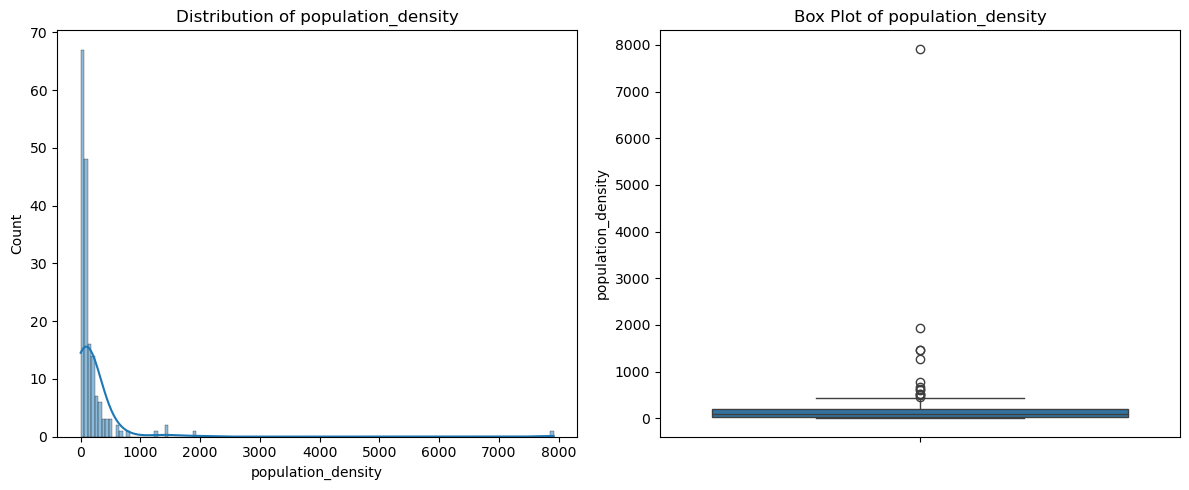


Descriptive Statistics for population_density:
count     176.000000
mean      202.353244
std       637.728668
min         1.980000
25%        34.789250
50%        81.534000
75%       199.246750
max      7915.731000
Name: population_density, dtype: float64
Skewness: 10.460164495012148
Kurtosis: 124.06113152171163




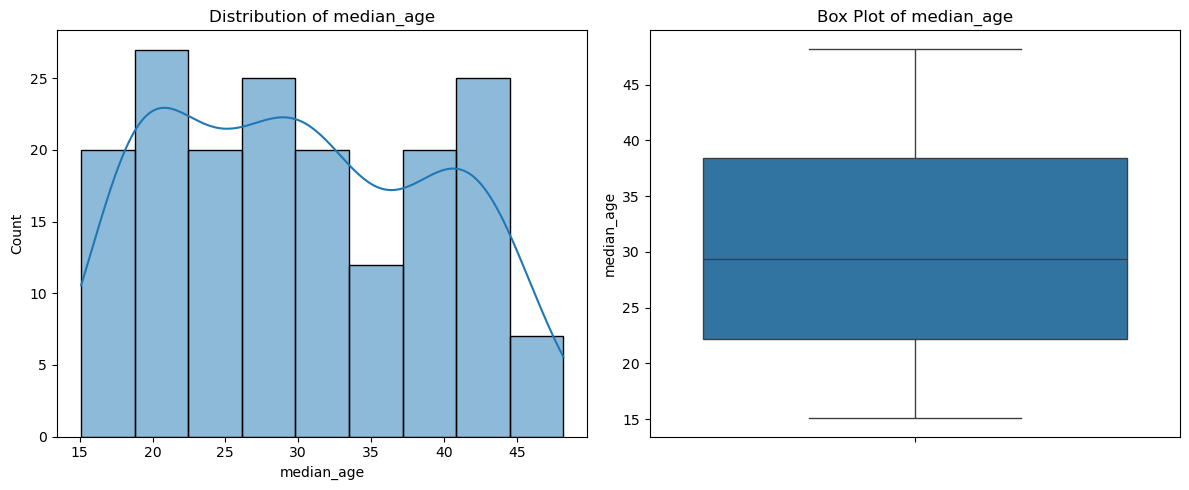


Descriptive Statistics for median_age:
count    176.000000
mean      30.181250
std        9.035008
min       15.100000
25%       22.150000
50%       29.350000
75%       38.400000
max       48.200000
Name: median_age, dtype: float64
Skewness: 0.16982323219698015
Kurtosis: -1.2028357318846992




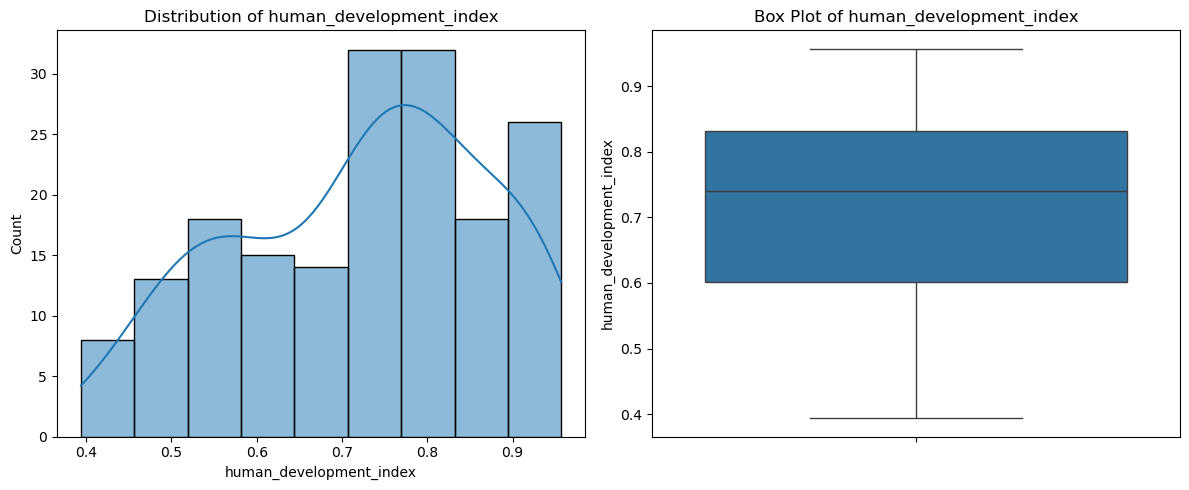


Descriptive Statistics for human_development_index:
count    176.00000
mean       0.72258
std        0.14930
min        0.39400
25%        0.60175
50%        0.74000
75%        0.83125
max        0.95700
Name: human_development_index, dtype: float64
Skewness: -0.317691814001466
Kurtosis: -0.8993670385828461




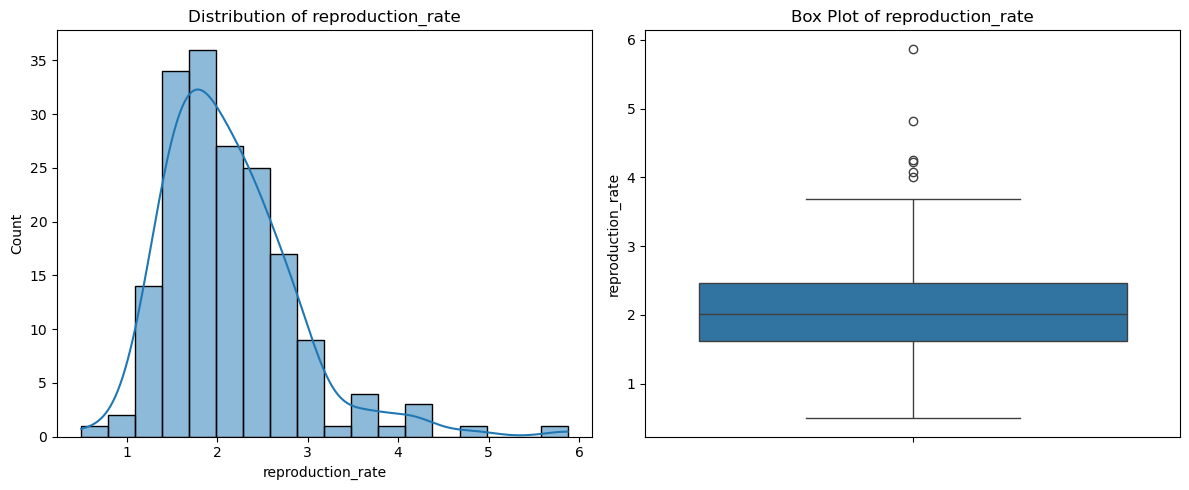


Descriptive Statistics for reproduction_rate:
count    176.00000
mean       2.13233
std        0.73209
min        0.50000
25%        1.62750
50%        2.02000
75%        2.47000
max        5.87000
Name: reproduction_rate, dtype: float64
Skewness: 1.5354854709657921
Kurtosis: 4.459893020511323




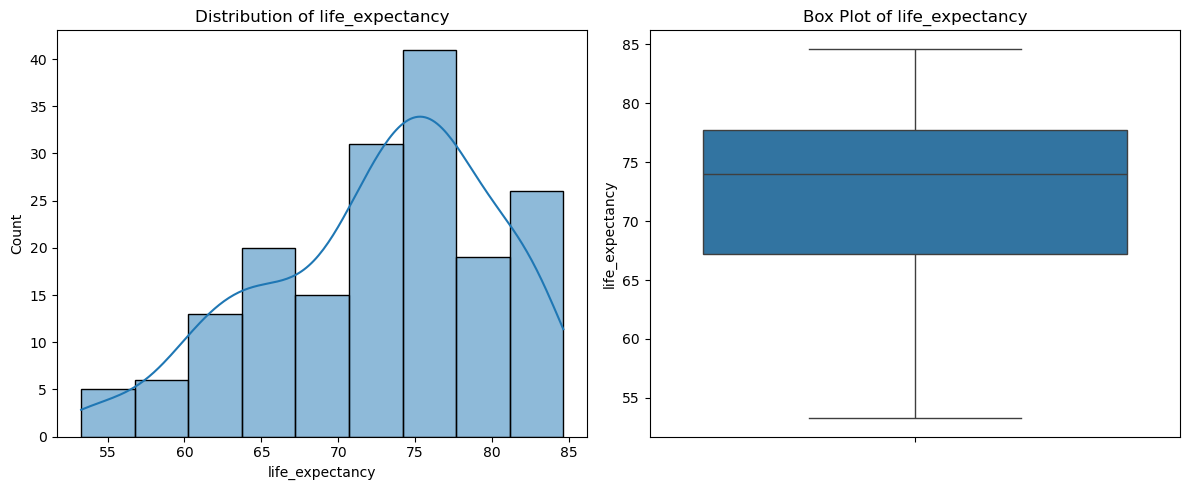


Descriptive Statistics for life_expectancy:
count    176.000000
mean      72.626250
std        7.398614
min       53.280000
25%       67.235000
50%       73.985000
75%       77.732500
max       84.630000
Name: life_expectancy, dtype: float64
Skewness: -0.561734255759015
Kurtosis: -0.37916247631880395




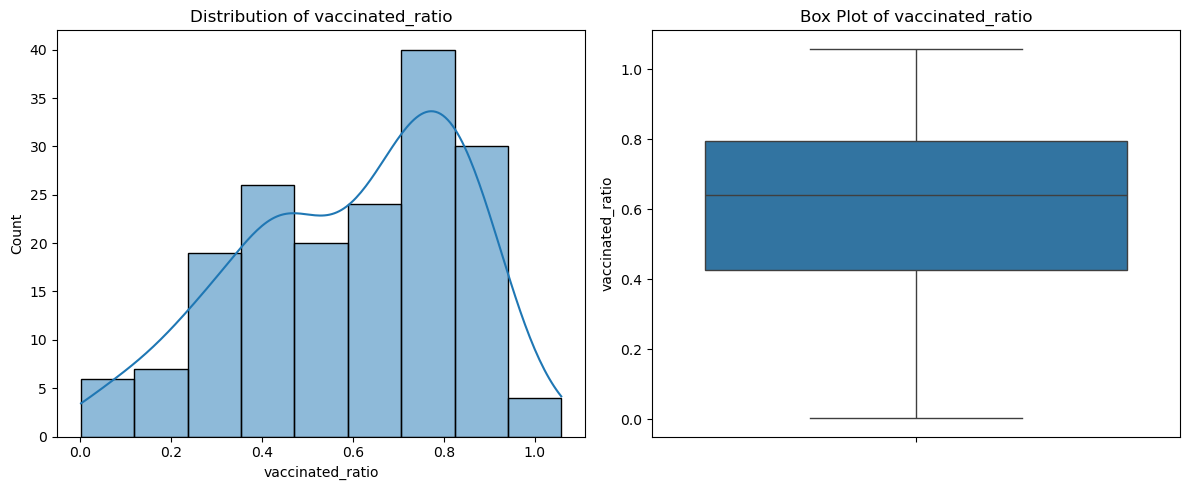


Descriptive Statistics for vaccinated_ratio:
count    176.000000
mean       0.597603
std        0.242298
min        0.002863
25%        0.425069
50%        0.641123
75%        0.795599
max        1.058271
Name: vaccinated_ratio, dtype: float64
Skewness: -0.44764860516680066
Kurtosis: -0.6675394096921097




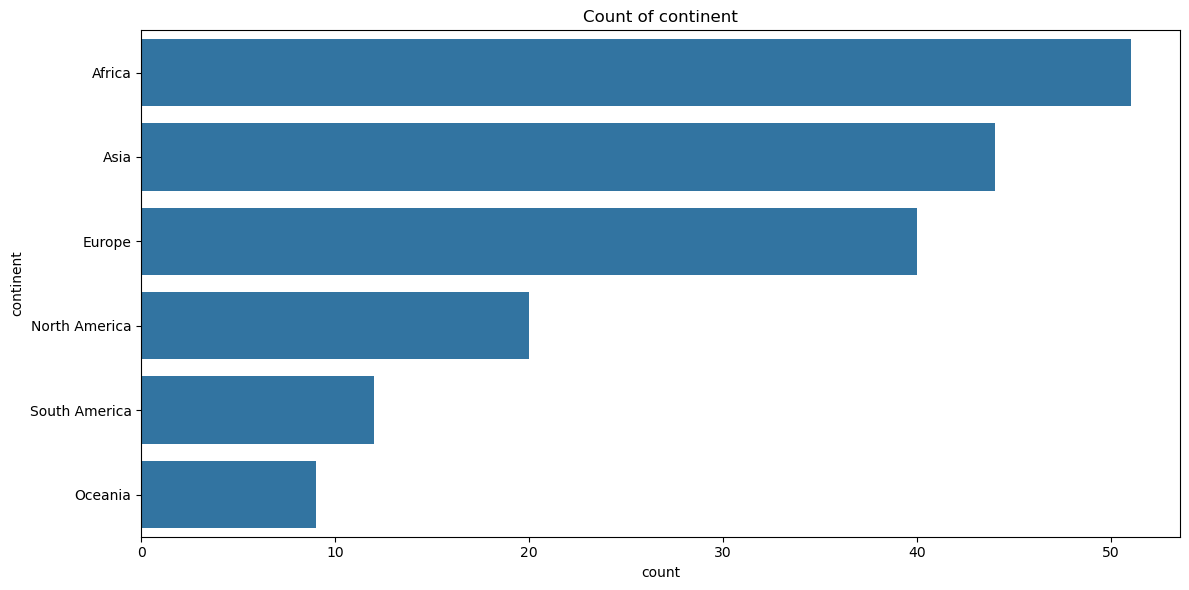


Value Counts for continent:
continent
Africa           51
Asia             44
Europe           40
North America    20
South America    12
Oceania           9
Name: count, dtype: int64




In [15]:

numerical_cols = vaccination_df.select_dtypes(include=[np.number]).columns


for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    
    plt.subplot(1, 2, 1)
    sns.histplot(vaccination_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    

    plt.subplot(1, 2, 2)
    sns.boxplot(y=vaccination_df[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    
    print(f"\nDescriptive Statistics for {col}:")
    print(vaccination_df[col].describe())
    print(f"Skewness: {vaccination_df[col].skew()}")
    print(f"Kurtosis: {vaccination_df[col].kurtosis()}")
    print("\n" + "="*50 + "\n")


categorical_cols = ['continent']  


for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=vaccination_df[col], order=vaccination_df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()
    
    print(f"\nValue Counts for {col}:")
    print(vaccination_df[col].value_counts())
    print("\n" + "="*50 + "\n")

The vaccination numbers vary widely, with a few countries having extremely high vaccination counts, which skews the average upwards. The median is much lower than the mean, indicating that most countries have relatively low vaccination numbers compared to the few with very high counts.

Similar to vaccination numbers, population sizes vary greatly, with a few countries having very large populations. The distribution is also right-skewed.

GDP per capita shows significant variation, with a few countries having very high GDPs. The right skew indicates that most countries have lower GDPs compared to a few wealthy nations.


The median age is relatively stable across countries, with a slight tendency towards younger populations in some regions.


HDI values are relatively high on average, indicating a generally good level of human development across the countries in the dataset.


The reproduction rate shows some variation, with a few countries having significantly higher rates.


Life expectancy is generally high, with a few countries having significantly lower life expectancies.


The vaccination ratio indicates that, on average, about 60% of the population in the countries has been vaccinated. The presence of values greater than 1 suggests potential data anomalies or countries with high vaccination rates relative to their population.

Now let's do bivariate analysis

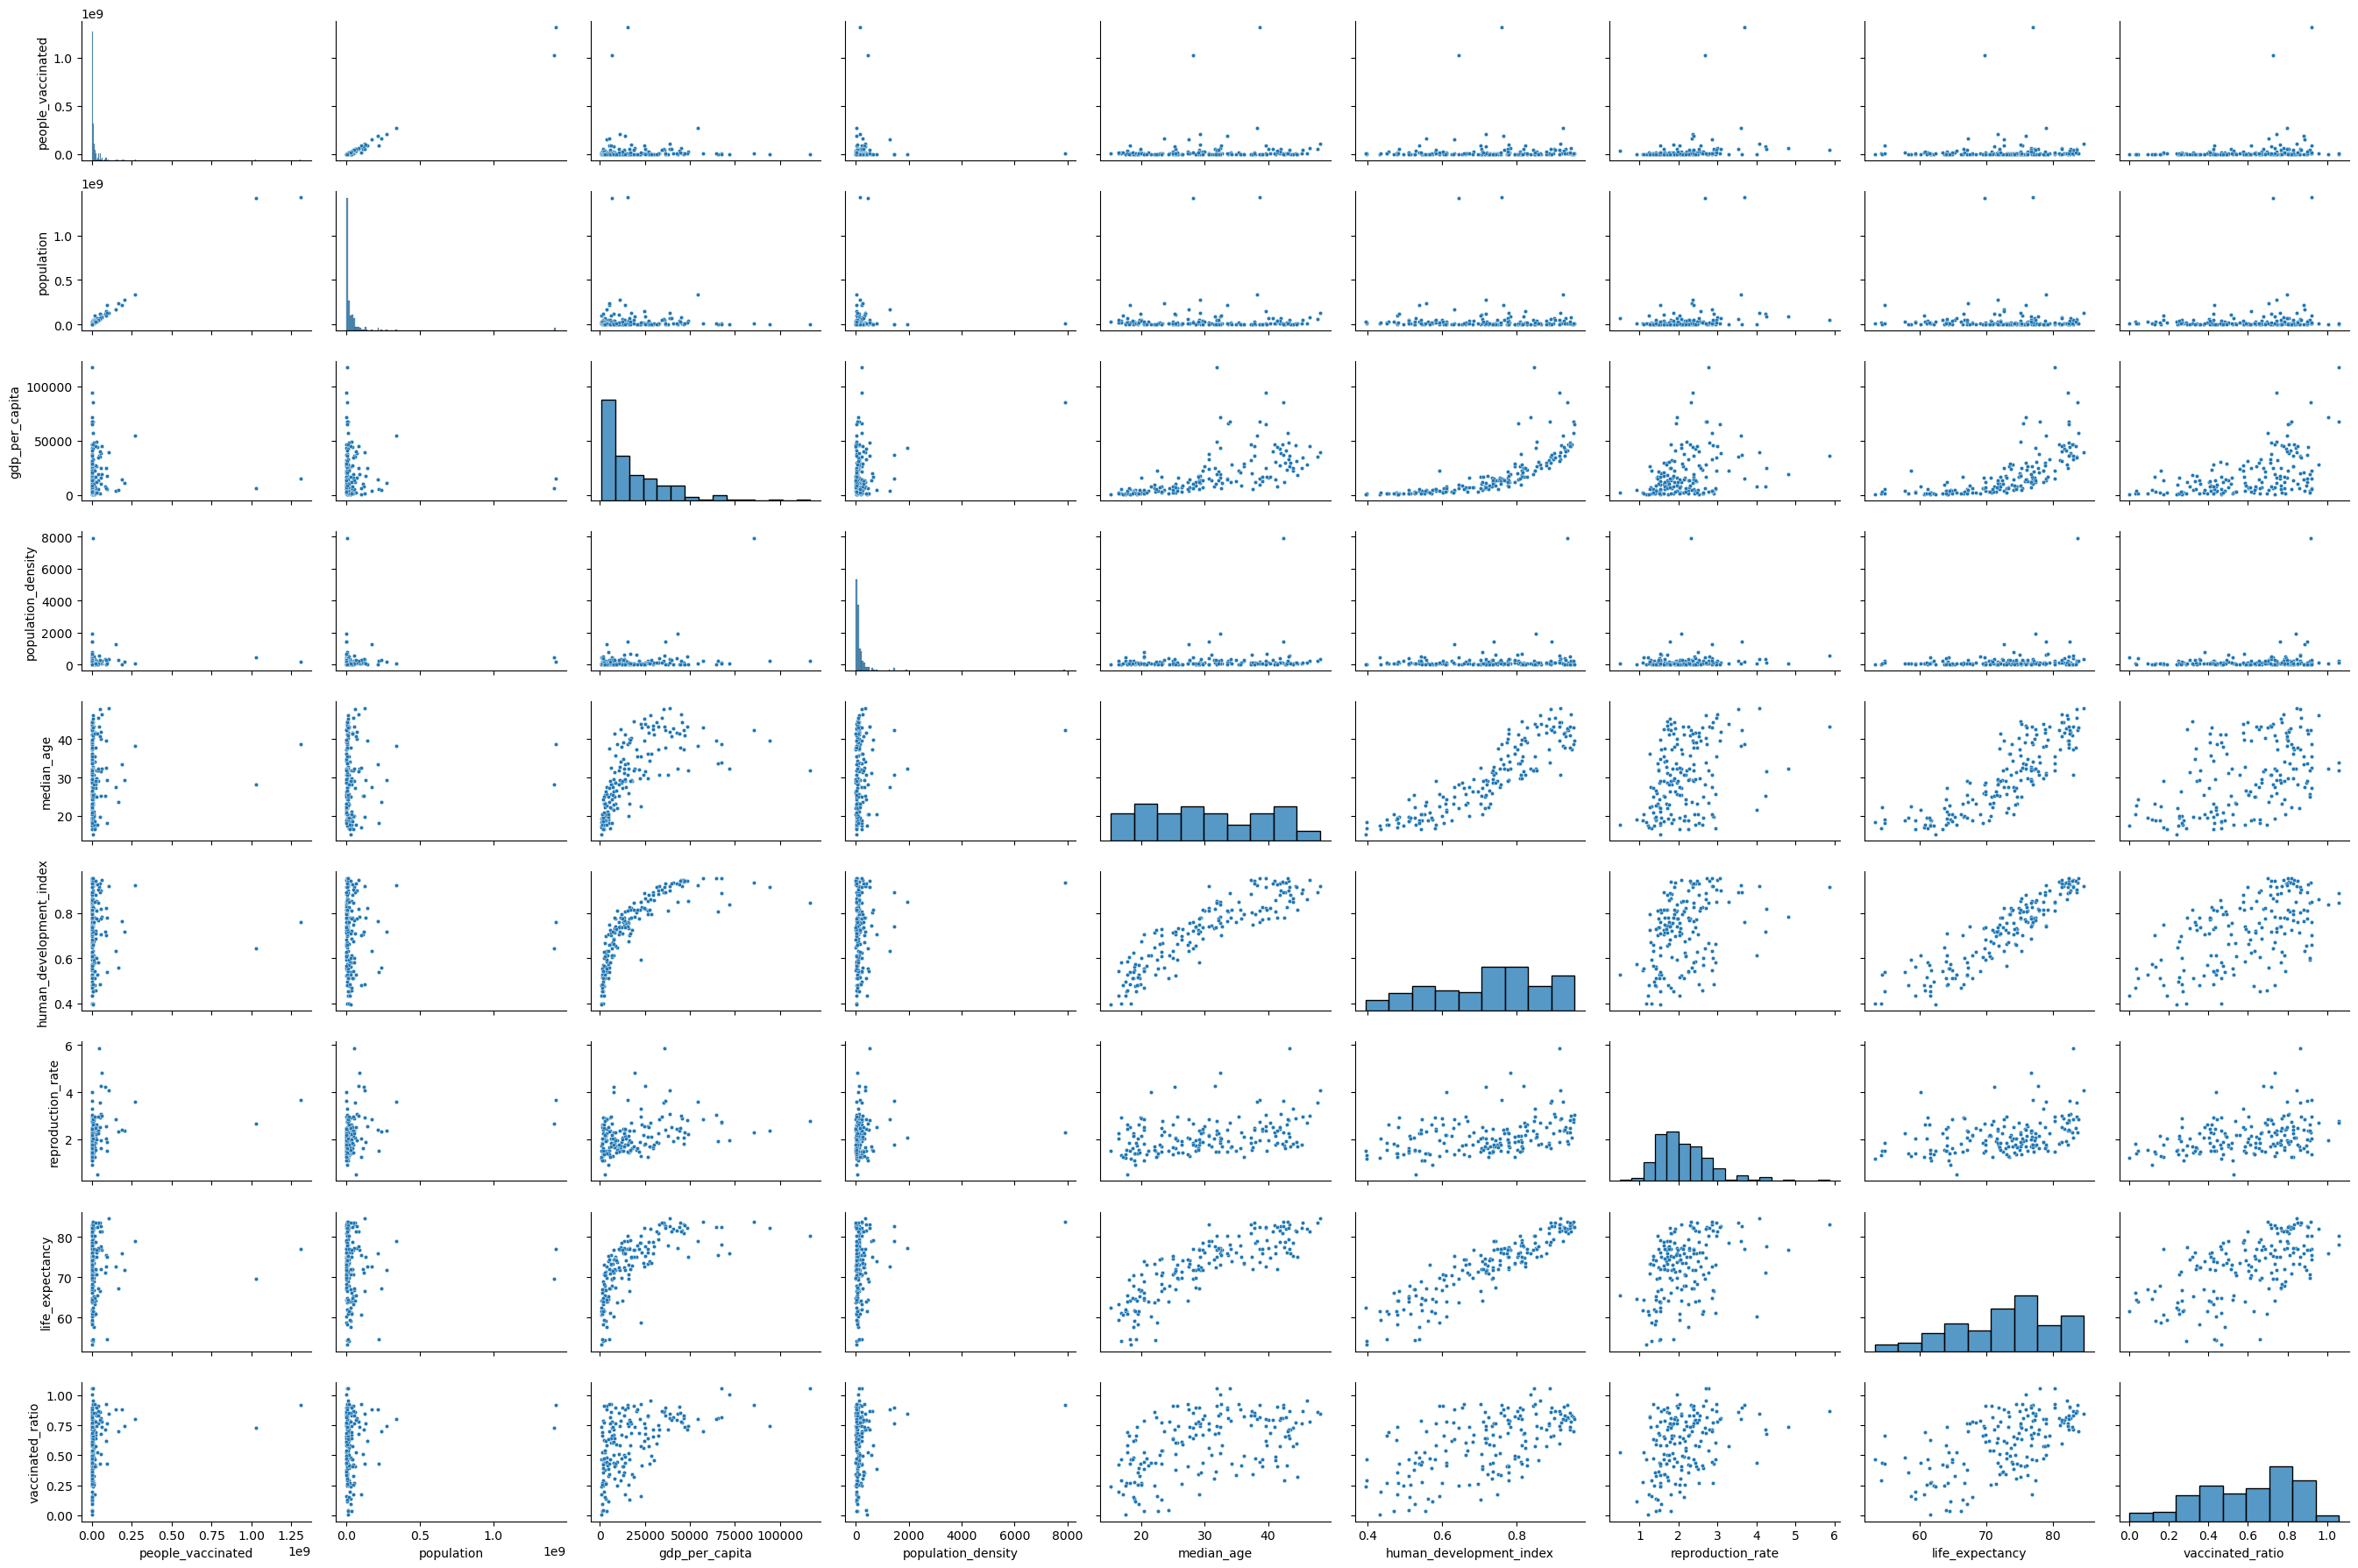

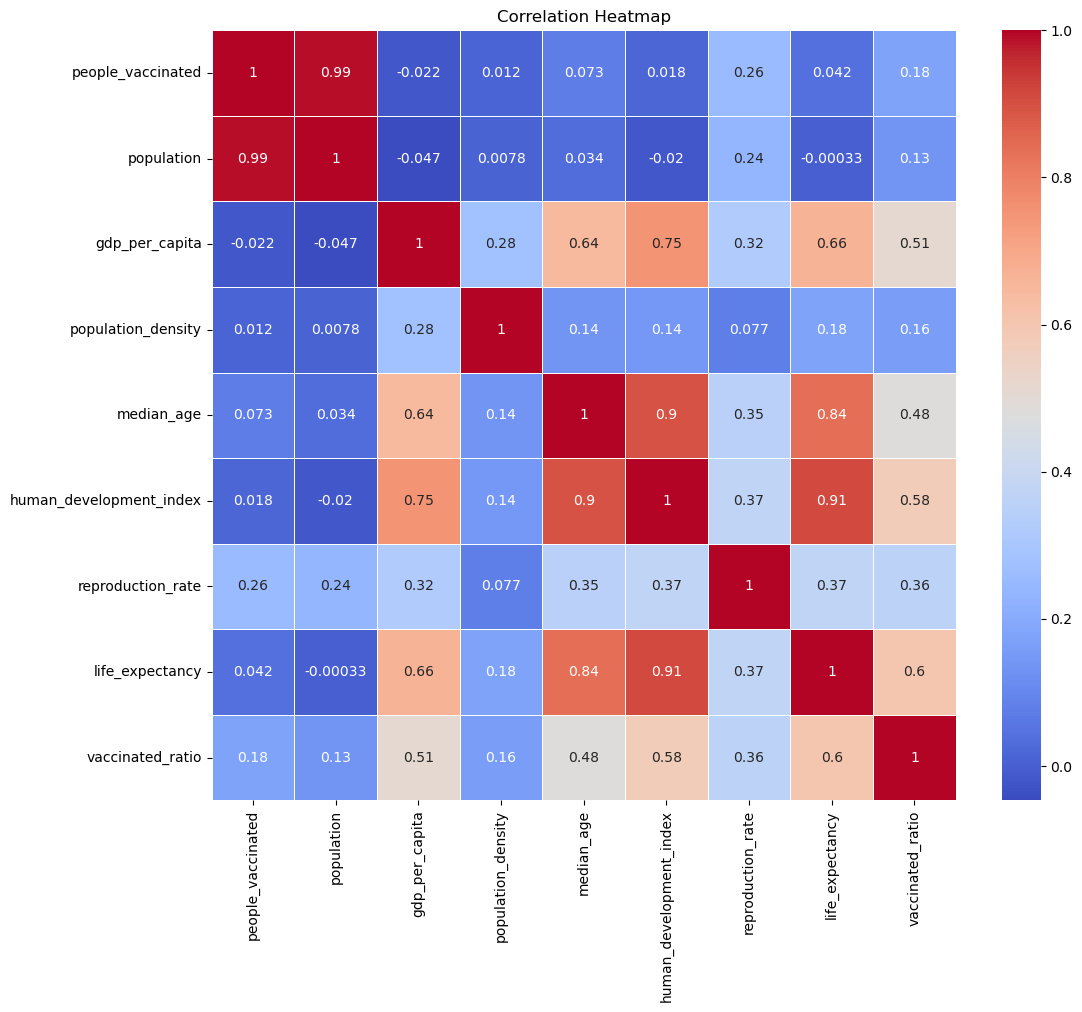

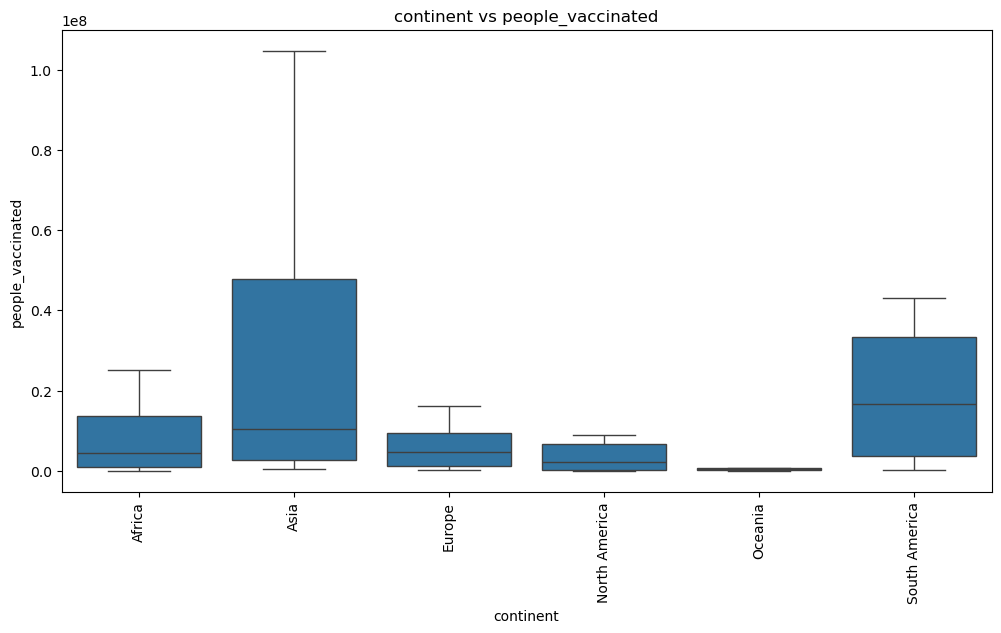

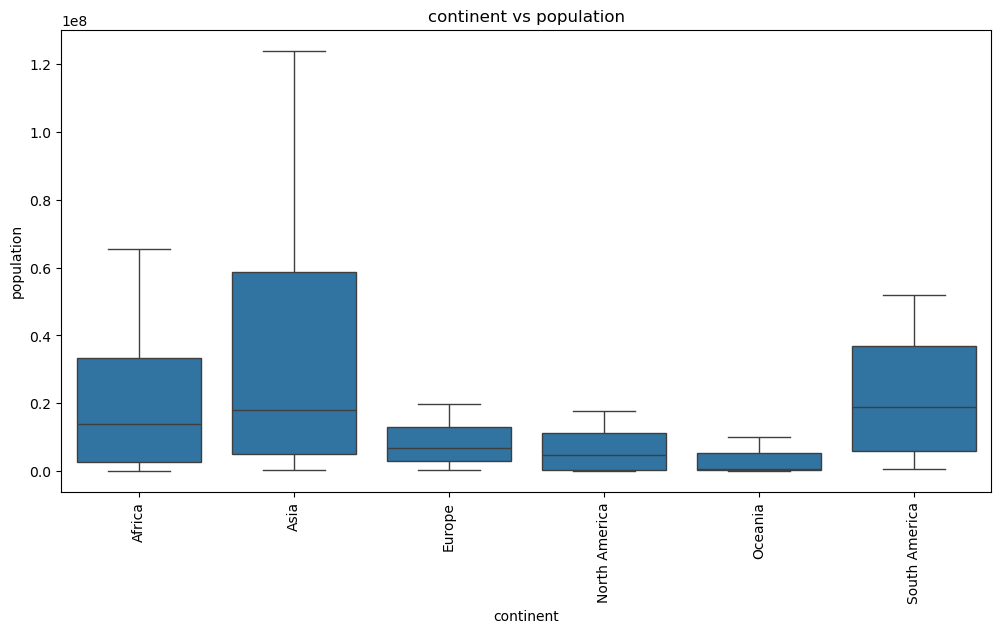

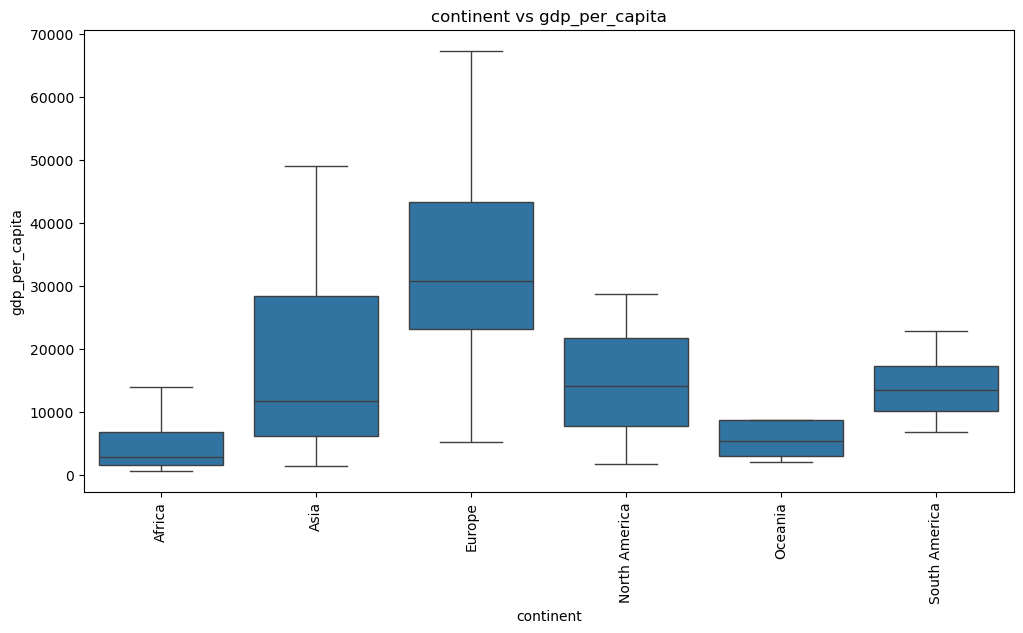

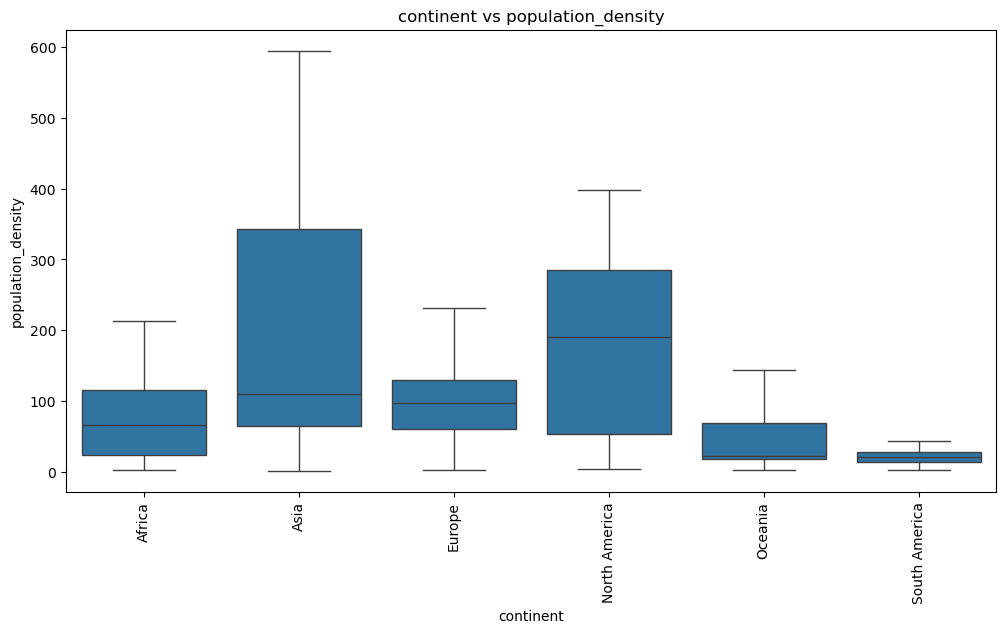

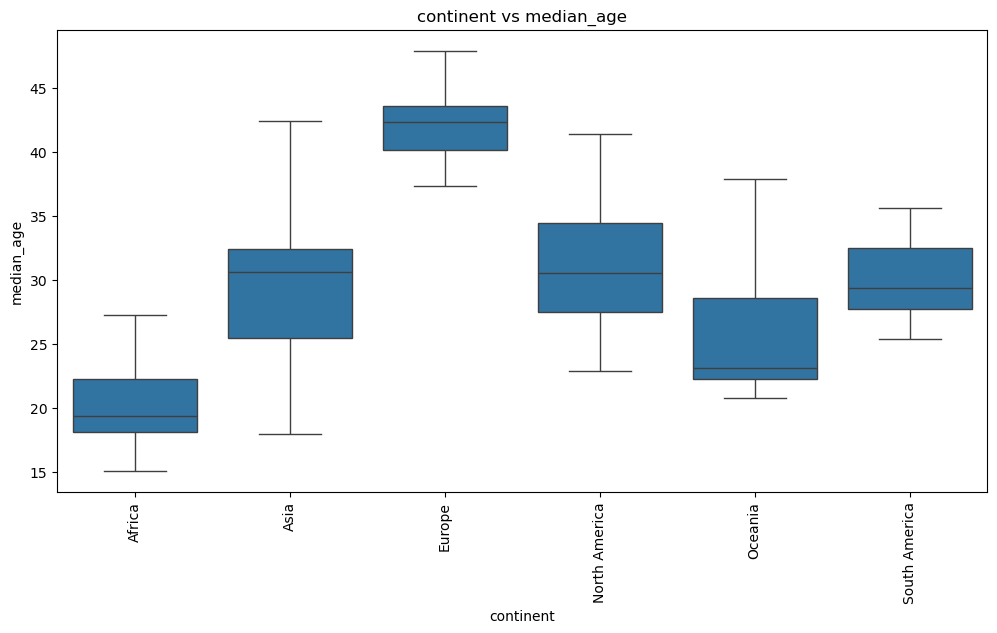

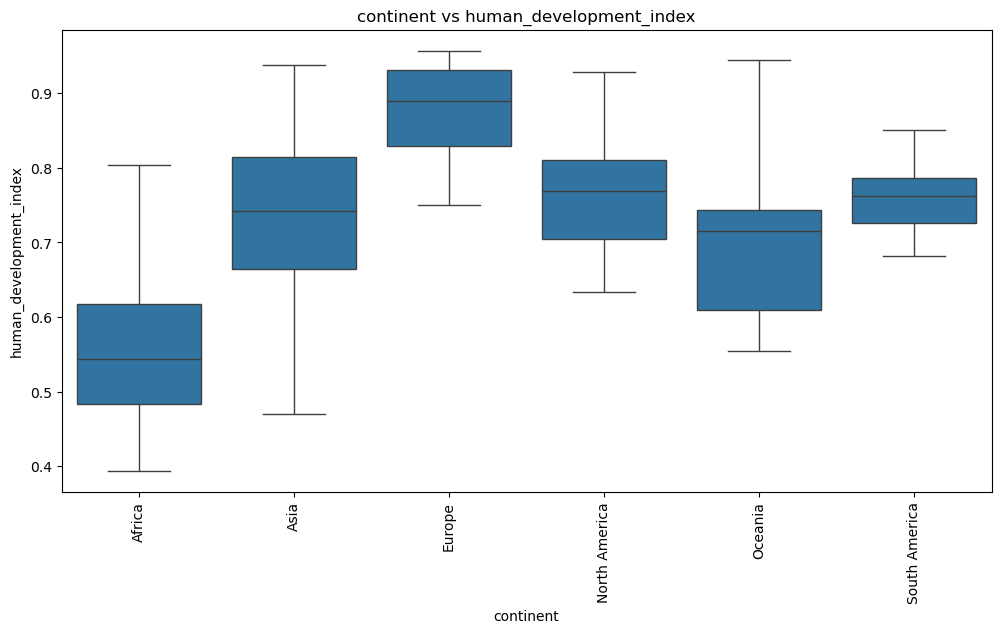

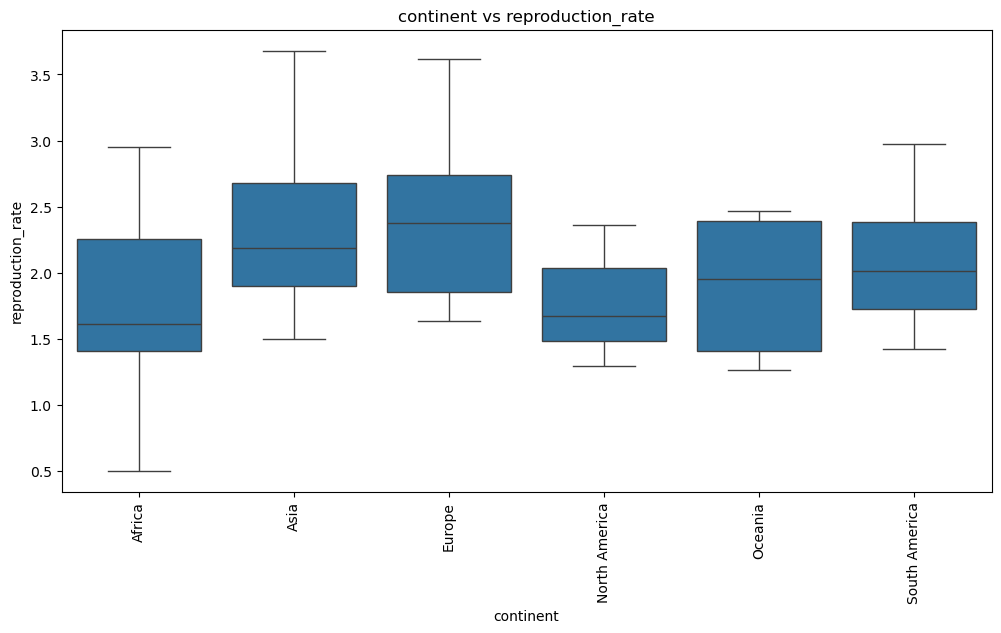

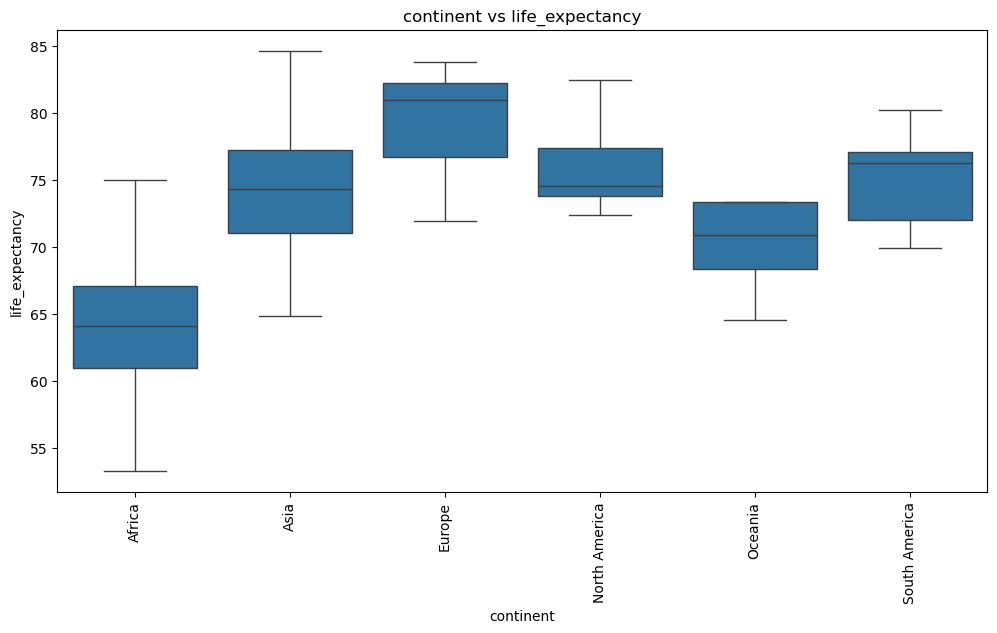

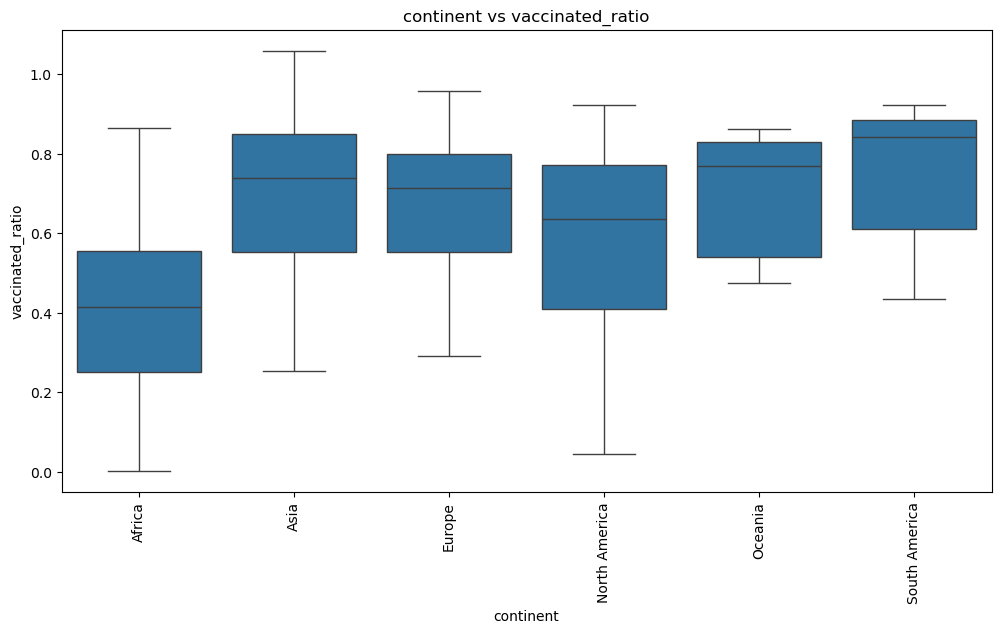

In [16]:

sns.pairplot(vaccination_df[numerical_cols], height=2, aspect=1.5, plot_kws={'s': 10})  # Reduced point size
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(vaccination_df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_col, y=num_col, data=vaccination_df, showfliers=False)  # Hide outliers
        plt.title(f'{cat_col} vs {num_col}')
        plt.xticks(rotation=90)
        plt.show()

HDI vs. Median Age: Strong positive correlation of 0.9, indicating that countries with higher Human Development Index values tend to have older populations.

Life Expectancy vs. HDI: High correlation of 0.91, showing that countries with higher HDI typically have better healthcare systems and, consequently, longer life expectancies.

Life Expectancy vs. Median Age: Correlation of 0.84, suggesting that higher life expectancy is associated with an older median age.

Vaccinated Ratio vs. Life Expectancy: Moderate correlation of 0.6, indicating a link between higher COVID-19 vaccination rates and longer life expectancy.

Vaccinated Ratio vs. HDI: Correlation of 0.58, showing that countries with higher development indices tend to have higher COVID-19 vaccination rates.

Vaccinated Ratio vs. Median Age: Weaker correlation of 0.48, potentially reflecting that countries with older populations are more likely to have better healthcare infrastructure and higher vaccination rates.

GDP per Capita: Europe has the highest GDP per capita, while Africa and Oceania rank the lowest. The scatterplot visualization highlights Europe’s leading position, with countries in Oceania at the lower end.

Median Age: Europe has the highest median age, while Africa has the lowest. Asia, North America, and Oceania have lower median ages than Europe but higher than Africa.

Human Development Index (HDI): Europe ranks the highest in HDI, while Africa ranks the lowest, consistent with other indicators like life expectancy and vaccination rates.

Life Expectancy: Europe leads in life expectancy, with lower figures in Africa. North America and Asia have relatively high life expectancies, though slightly lower than Europe.

Vaccinated Ratio: Asia, Europe, North America, Oceania, and South America show similar vaccination rates, with Africa having the lowest rate, despite excluding outliers.

Conclusions:

The analysis highlights strong correlations between development indicators, healthcare, and population demographics.
Higher HDI correlates with longer life expectancy and older median age.
Countries with better healthcare infrastructure, typically in more developed regions, have higher vaccination rates.
Regional disparities are evident, with Africa consistently ranking lower in HDI, life expectancy, and vaccination coverage, while Europe consistently leads across most indicators.

Now let's do multivariate analysis

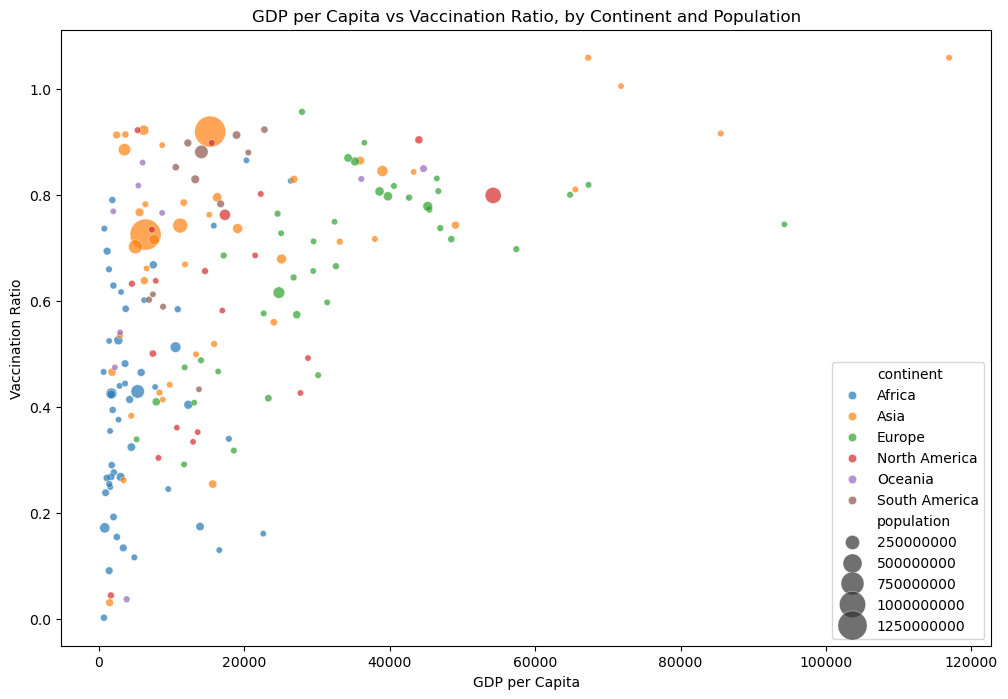

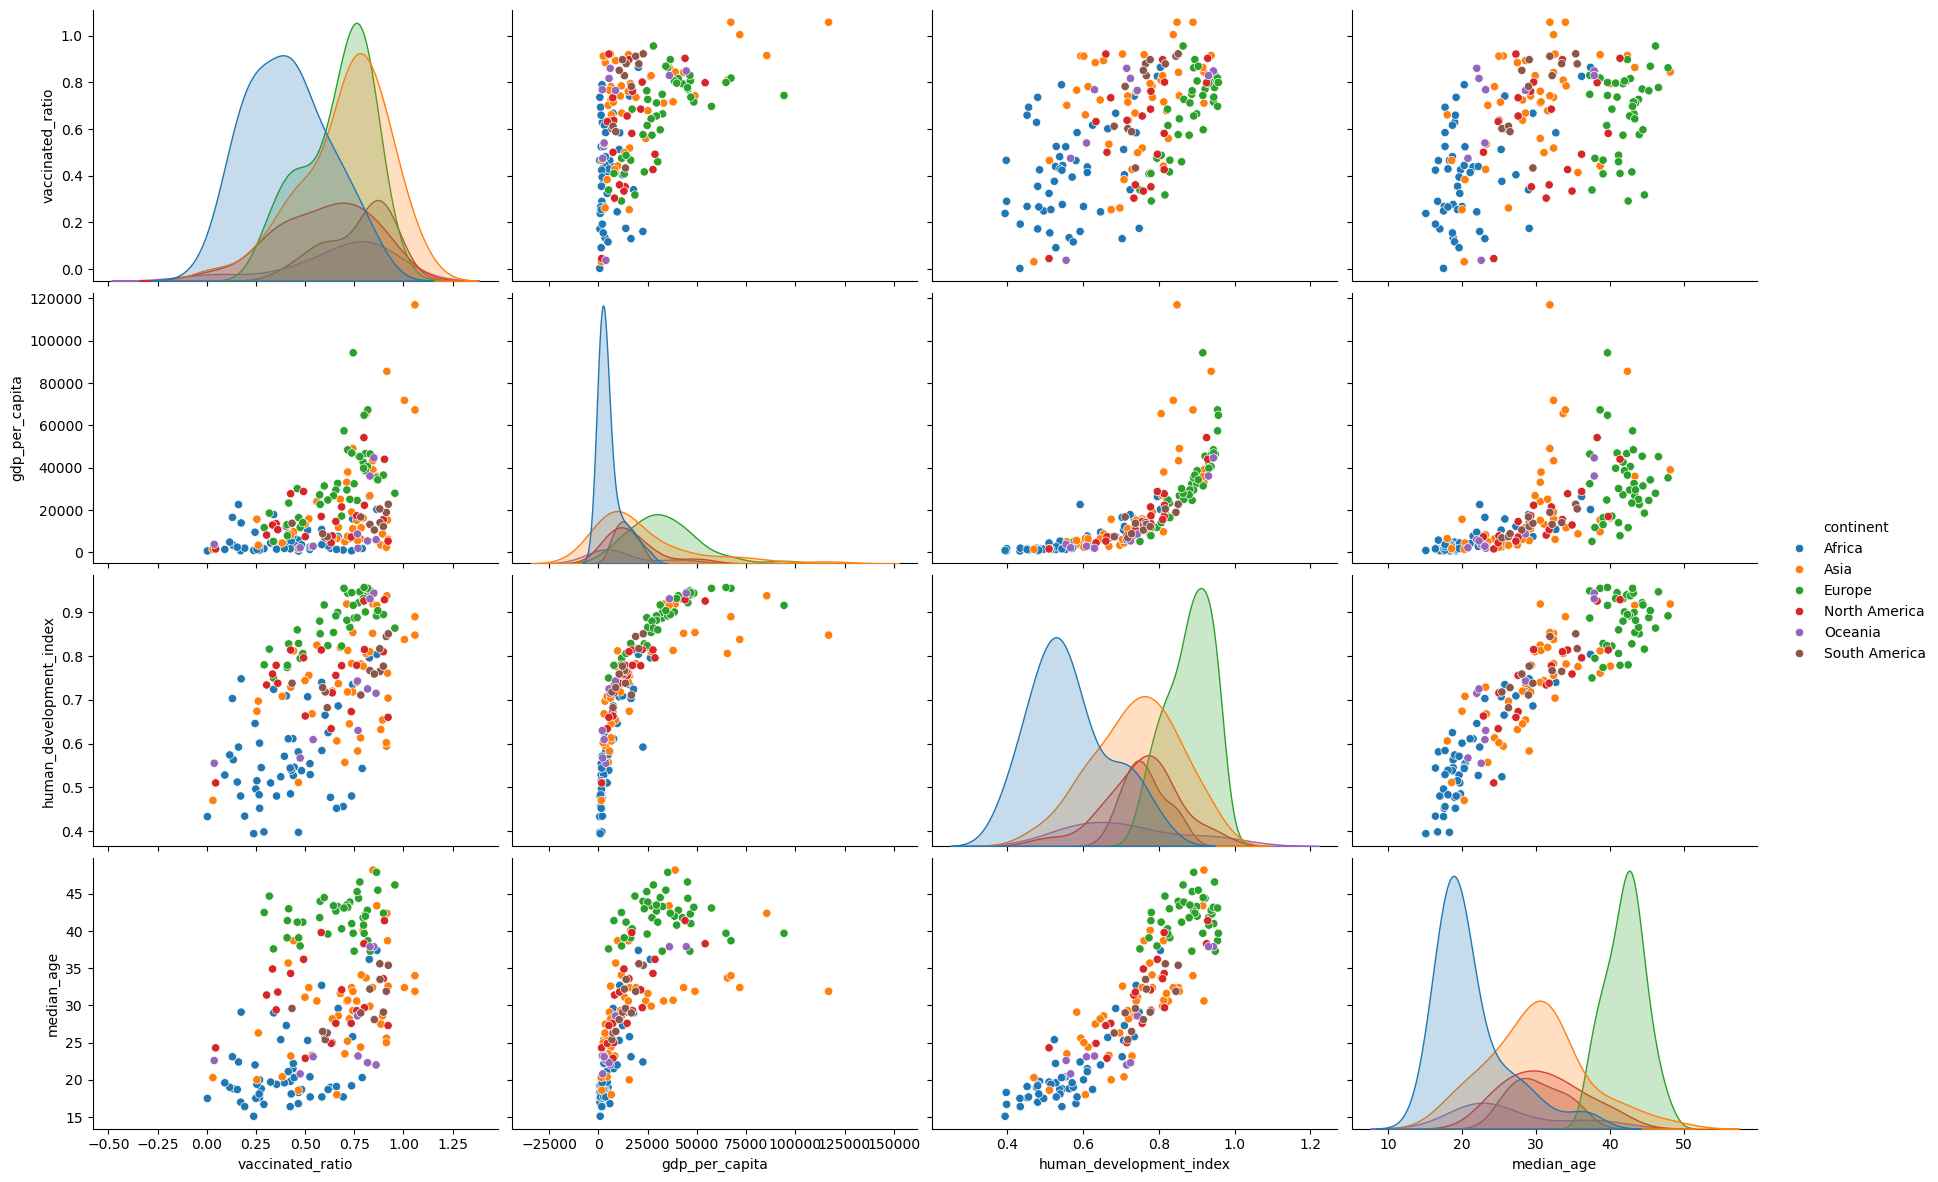

In [17]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='gdp_per_capita', y='vaccinated_ratio', 
              size='population', hue='continent', 
              data=vaccination_df, sizes=(20, 500), alpha=0.7)
plt.title('GDP per Capita vs Vaccination Ratio, by Continent and Population')
plt.xlabel('GDP per Capita')
plt.ylabel('Vaccination Ratio')
plt.show()


sns.pairplot(vaccination_df, vars=['vaccinated_ratio', 'gdp_per_capita', 'human_development_index', 'median_age'],
           hue='continent', height=3, aspect=1.5)
plt.show()

Let's do linera regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = vaccination_df[['gdp_per_capita', 'human_development_index', 'median_age']]
y = vaccination_df['vaccinated_ratio']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


for feature, coef in zip(X.columns, model.coef_):
  print(f"Coefficient for {feature}: {coef}")


Linear Regression Results:
Mean Squared Error: 0.03921639433206681
R-squared: 0.36791910685858076
Coefficient for gdp_per_capita: 2.660283588265109e-06
Coefficient for human_development_index: 0.8771448826886293
Coefficient for median_age: -0.004678176933653799


The R-squared value of 0.368 indicates that about 36.8% of the variance in vaccination ratios can be explained by these three factors.

The human development index has the largest positive coefficient (0.877), suggesting it has the strongest positive impact on vaccination rates among these variables.

GDP per capita has a small positive coefficient, while median age has a slight negative coefficient.

The model's performance is moderate, indicating that while these factors do influence vaccination rates, other factors not included in the model also play significant roles.